### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load The Data Set

In [3]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


### Check The Information of Data set

In [4]:
#Data types of columns
df.dtypes

area     int64
price    int64
dtype: object

In [5]:
#column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [6]:
#Statistical measures
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


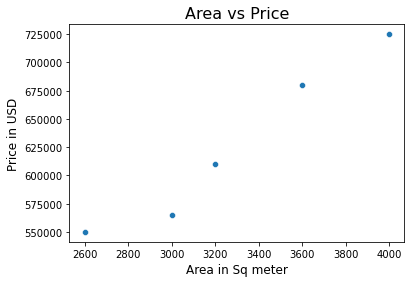

In [7]:
#Scatter plot to see distribution of data
sns.scatterplot(x='area', y='price', data=df)
plt.xlabel('Area in Sq meter', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title('Area vs Price', fontsize=16);

### Apply Linear Regression to predict Price

In [15]:
Area=df.drop('price',axis=1)
Area

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [16]:
Price=df.price
Price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model=model.fit(Area, Price)

#### 1) Predict the house price for area=3000 sq. meter

In [24]:
price_predicted=model.predict([[3000]])
price_predicted

array([587979.45205479])

#### 2) Predict the house price for area=5000 sq. meter

In [25]:
price_predicted=model.predict([[5000]])
price_predicted

array([859554.79452055])

**Check manually using Formula Whether the predicted values are accurate**

Linear equation= **Y=mx+b**
* here m is slope or gradient or coeffient & b is constant or interecept

In [27]:
model.coef_

array([135.78767123])

In [28]:
model.intercept_

180616.43835616432

In [29]:
#using formula where x=5000
135.78767123*5000+180616.43835616432

859554.7945061643

#### Plot the regression line for following area

In [32]:
a=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\house_price_prediction_area.csv')
a.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [35]:
p=model.predict(a)
p[:5]

array([316404.10958904, 384297.94520548, 492928.08219178, 661304.79452055,
       740061.64383562])

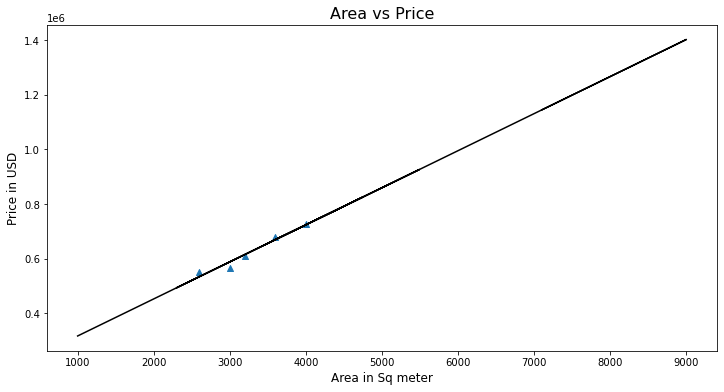

In [43]:
plt.figure(figsize=(12,6))
plt.scatter(x='area', y='price', data=df, marker='^')
plt.xlabel('Area in Sq meter', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title('Area vs Price', fontsize=16)
plt.plot(a.area, p,color='black')